In [2]:
import pandas as pd, numpy as np
pd.set_option("display.max_rows", None)
pd.set_option("display.max_column", None)
path = 'C:\\users\\iny2819\\kroger\\Data\\'

### Cluster Attribute Value Counts

In [3]:
clust_itm_atb = pd.read_csv(path + 'AttributeData_Itemwise_Clustering_500K_081723.csv', dtype='unicode')

In [4]:
clust_itm_atb.head()

,GTIN_NO,ClusterLabel,Cluster Name,Cluster Size,Method of Sweetening,Level of Sugar/Sucrose/Sweetener Claim,Whole Grains - Contained in Product,Flavor(s),Milk Product/Substitute,Cheese Product Type,Juice Percentage,Level of Cooking,Genre,Color,Size Description,Card Is Closed Loop,Denomination of Card,Card Processor,Card is General Purpose Reloadable (GPR),Value of Card (Fixed or Variable),Other Size Description,Whole Grain Percent,Other Color,Item Bone In,USDA Meat Grade,Type of Processing Required at Store Level,Harvest Type,In Store Prepared/Packaged,Boneless Claim,Intended to be Used as a Topping or Ingredient,Consumer Lifestage,Age Restricted,Rating,Shelf Life of Product without Expiration Date on Package,Recommended Shelf Life Once Seal Broken on Packaging,Floral Container Type,Potted Plant,Shipping Material,Is Item Intended for Human Consumption?,Pot/Planter Size - Liquid Measure,Product is Labeled with an FDA Approved National Drug Code (NDC),Scent,Alcohol Proof,Type of Spirit,Consumer Unit Resealable,Type of Alcoholic Beverage Content,Artist,Other Floral Container Type,Type of Alcoholic Cordial/Syrup,Type of Tobacco,Fee Printed on Card,Variable Denomination of Card Maximum Amount,Minutes on Card,Data Allowance,Type of Airtime Card,Sold only at Kroger Fuel Centers,Type of Phone Card,Card Reloadable,Texts Allowance,Telecom Carrier,Pseudoephedrine (PSE) Amount in package,Type of Beer,Banner Name,ATI_TIP_KIT_ICD_VLU,ASBD_ACU_PDT_HGT_IN_INCH,ASBD_ACU_PDT_LTH_IN_INCH,ASBD_ACU_PDT_WTH_IN_INCH,ASB_REQ_VLU,AVG_WTTG_VLU,BTR_REQ_VLU,BRD_ANM_TYP_VLU,BLM_SSON_VLU,CORD_LTH_TX,FIN_VLU,HIN_ZNE_VLU,LGT_REQ_VLU,MTL_VLU,VND_BRN_NAM,GLU_FRE_CLM_VLU,LVL_OF_NON_GMO_CLM_VLU,MIN_DAYS_OF_SHF_LIF_AT_WHS_DAYS,NET_CONT_EQV_UOM_VIP_TO_KRG_UOM,NON_GMO_PDT_FL,ORG_CLM_VLU,RDM_WGT_FL,CER_FOR_POV_DIET_FL,LIV_NAT_ELG_FL,PDT_FRE_FRO_VLU,SRV_CNT_VLU,SYP_RLF_VLU,TPT_CLS_VLU,INE_USE_OF_PDT_TX,NO_OF_SERV_PER_PKG_NO,SIZ_QY,SNAP_ELG_FL,TYP_OF_LBL_VLU,ALH_FL,HAZ_FL,IS_EDBL_VLU,IS_TPCL_VLU,NUTRI_CALR,SBSP_ITM,KRG_OWN_IS_CHEM_VLU,KRG_OWN_IS_RAW_VLU,SHF_LIF_QY,ASBD_ACU_PDT_WGT_IN_LBS,BGR_ICD_VLU,BTR_ICD_VLU,BTR_TYP_VLU,BPA_FRE_VLU,CPC_IN_OZ,CLX_DSC,CVR_ARA_SQR_FT,FLV_DSC,INDR_OR_OUTD_VLU,MFR_WTY_LTH_OF_TM_IN_MON,NON_STK_VLU,SCT_DSC,TPT_THS_IN_DGE_FEH,TOY_TYP_VLU,VEH_TYP_VLU,ORG_TRD_ITM_VLU,Shellfish,Milk and its Derivatives,Fish and Their Derivatives,Eggs and Their Derivatives,Crustaceans and Their Derivatives,Tree Nuts and Their Derivatives,Sulfur Dioxide and Sulfits,Peanuts and Their Derivatives,Sesame Seeds and Their Derivatives,Soybean and its Derivatives,Wheat and Their Derivatives,Corn and Its Derivatives,Other gluten Containing Grain and Gluten Containing Grain Products,Does Not Contain Declaration Obligatory Allergens,Sunflower Seeds and Their Derivatives,Carrots and Their Derivatives,Celery and its Derivatives,Cereals and Their Derivatives,Barley and Barley Products,Seed Products,Rye and Their Derivatives,Oats,Almond and Almond Products,"CONTAINS TRACES OF TREE NUTS, I.E. ALMONDS, VARIOUS KINDS OF TREE NUTS",Coconuts and Their Derivatives,Lactose,Pod Fruits and Their Derivatives,Molluscs and Their Derivatives,Poppy Seeds and Their Derivatives,Benzyl Alcohol,Anise Alcohol,Amylcinnamyl Alcohol,Cashew and Cashew Products,Cocoa and its Derivatives,Walnut and Walnut Products,Glutamate and Their Derivatives,Mustard and its Derivatives,Pecan Nut and Pecan Nut Products,Macadamia Nut and Macadamia Nut Products,1-Naphthol,Queensland Nut and Queensland Nut Products,Pine Nut and Their Derivatives,Chicken Meat and Their Derivatives,Pork and its Derivatives,Salmon and its Derivatives,Sole and its Derivatives,Hazelnut and Hazelnut Products,Citronellol,Beef and its Derivatives,Lupine and its Derivatives,"1,3-Bis-(2,4-diaminophenoxy)propane",Pistachio and Pistachio Products,Brazil Nut and Brazil Nut Products,d-Limonene,Coumarin,Coriander and its Derivatives,Spelt and Spelt Products,Peas and Pea Products,Kamut,Linalool,Citral,Cod and its Derivatives,Pulses,Triticale and Th

In [5]:
atb_cols = clust_itm_atb.columns[4:]
res = pd.DataFrame(clust_itm_atb.groupby('ClusterLabel').apply(lambda x:{i: dict(x[i].value_counts()/len(x)) for i in atb_cols})).reset_index()

In [6]:
res.to_csv(path + 'Clust_Attribute_Distributions_0831.csv', index = None)

In [7]:
atb_cols = clust_itm_atb.columns[4:]
res_freq = pd.DataFrame(clust_itm_atb.groupby('ClusterLabel').apply(lambda x:{i: len(x[i].dropna())/len(x) for i in atb_cols})).reset_index()

In [6]:
pd.DataFrame(list(res_freq[0])).to_csv(path + 'Clust_Attribute_Frequency_0831.csv', index = None)

In [8]:
res_freq.to_csv(path + 'Clust_Attribute_Frequency_0831_all.csv', index = None)

### Attribute Frequency based Clustering

In [17]:
atb_freq = pd.read_csv(path + 'Clust_Attribute_Frequency_0831_yue.csv')

In [18]:
clust_atb = pd.read_csv(path + 'SuperClusteringResults_081723.csv')[['ClusterLabel','Cluster Name','Cluster Size','Non-Null Attributes']]

In [19]:
clust_atb.head()

,ClusterLabel,Cluster Name,Cluster Size,Non-Null Attributes
0,0,"PARTY EVERYDAY,NOVELTY AND DECOR,GIFT-WRAP SEA...",1306,"['Color', 'Size Description', 'Other Size Desc..."
1,1,"ACCENT FURNITURE,KITCHEN/DINING,DECORATIVE ACC...",1145,"['Genre', 'Color', 'Size Description', 'Other ..."
2,2,"TEA BAGS & BULK TEA,TEA SWEETENED,TEA BAGS/HER...",1086,"['Method of Sweetening', 'Level of Sugar/Sucro..."
3,3,CARDS EVERYDAY,1085,"['VND_BRN_NAM', 'NET_CONT_EQV_UOM_VIP_TO_KRG_U..."
4,4,"COLD WEATHER ACS,BRANDED COLLECTIONS,JUNIOR SL...",991,"['Color', 'Size Description', 'Other Size Desc..."


In [21]:
atb_freq.head()

,Method of Sweetening,Level of Sugar/Sucrose/Sweetener Claim,Whole Grains - Contained in Product,Flavor(s),Milk Product/Substitute,Cheese Product Type,Juice Percentage,Level of Cooking,Genre,Color,Size Description,Card Is Closed Loop,Denomination of Card,Card Processor,Card is General Purpose Reloadable (GPR),Value of Card (Fixed or Variable),Other Size Description,Whole Grain Percent,Other Color,Item Bone In,USDA Meat Grade,Type of Processing Required at Store Level,Harvest Type,In Store Prepared/Packaged,Boneless Claim,Intended to be Used as a Topping or Ingredient,Consumer Lifestage,Age Restricted,Rating,Shelf Life of Product without Expiration Date on Package,Recommended Shelf Life Once Seal Broken on Packaging,Floral Container Type,Potted Plant,Shipping Material,Is Item Intended for Human Consumption?,Pot/Planter Size - Liquid Measure,Product is Labeled with an FDA Approved National Drug Code (NDC),Scent,Alcohol Proof,Type of Spirit,Consumer Unit Resealable,Type of Alcoholic Beverage Content,Artist,Other Floral Container Type,Type of Alcoholic Cordial/Syrup,Type of Tobacco,Fee Printed on Card,Variable Denomination of Card Maximum Amount,Minutes on Card,Data Allowance,Type of Airtime Card,Sold only at Kroger Fuel Centers,Type of Phone Card,Card Reloadable,Texts Allowance,Telecom Carrier,Pseudoephedrine (PSE) Amount in package,Type of Beer,Banner Name,ATI_TIP_KIT_ICD_VLU,ASBD_ACU_PDT_HGT_IN_INCH,ASBD_ACU_PDT_LTH_IN_INCH,ASBD_ACU_PDT_WTH_IN_INCH,ASB_REQ_VLU,AVG_WTTG_VLU,BTR_REQ_VLU,BRD_ANM_TYP_VLU,BLM_SSON_VLU,CORD_LTH_TX,FIN_VLU,HIN_ZNE_VLU,LGT_REQ_VLU,MTL_VLU,VND_BRN_NAM,GLU_FRE_CLM_VLU,LVL_OF_NON_GMO_CLM_VLU,MIN_DAYS_OF_SHF_LIF_AT_WHS_DAYS,NET_CONT_EQV_UOM_VIP_TO_KRG_UOM,NON_GMO_PDT_FL,ORG_CLM_VLU,RDM_WGT_FL,CER_FOR_POV_DIET_FL,LIV_NAT_ELG_FL,PDT_FRE_FRO_VLU,SRV_CNT_VLU,SYP_RLF_VLU,TPT_CLS_VLU,INE_USE_OF_PDT_TX,NO_OF_SERV_PER_PKG_NO,SIZ_QY,SNAP_ELG_FL,TYP_OF_LBL_VLU,ALH_FL,HAZ_FL,IS_EDBL_VLU,IS_TPCL_VLU,NUTRI_CALR,SBSP_ITM,KRG_OWN_IS_CHEM_VLU,KRG_OWN_IS_RAW_VLU,SHF_LIF_QY,ASBD_ACU_PDT_WGT_IN_LBS,BGR_ICD_VLU,BTR_ICD_VLU,BTR_TYP_VLU,BPA_FRE_VLU,CPC_IN_OZ,CLX_DSC,CVR_ARA_SQR_FT,FLV_DSC,INDR_OR_OUTD_VLU,MFR_WTY_LTH_OF_TM_IN_MON,NON_STK_VLU,SCT_DSC,TPT_THS_IN_DGE_FEH,TOY_TYP_VLU,VEH_TYP_VLU,ORG_TRD_ITM_VLU,Shellfish,Milk and its Derivatives,Fish and Their Derivatives,Eggs and Their Derivatives,Crustaceans and Their Derivatives,Tree Nuts and Their Derivatives,Sulfur Dioxide and Sulfits,Peanuts and Their Derivatives,Sesame Seeds and Their Derivatives,Soybean and its Derivatives,Wheat and Their Derivatives,Corn and Its Derivatives,Other gluten Containing Grain and Gluten Containing Grain Products,Does Not Contain Declaration Obligatory Allergens,Sunflower Seeds and Their Derivatives,Carrots and Their Derivatives,Celery and its Derivatives,Cereals and Their Derivatives,Barley and Barley Products,Seed Products,Rye and Their Derivatives,Oats,Almond and Almond Products,"CONTAINS TRACES OF TREE NUTS, I.E. ALMONDS, VARIOUS KINDS OF TREE NUTS",Coconuts and Their Derivatives,Lactose,Pod Fruits and Their Derivatives,Molluscs and Their Derivatives,Poppy Seeds and Their Derivatives,Benzyl Alcohol,Anise Alcohol,Amylcinnamyl Alcohol,Cashew and Cashew Products,Cocoa and its Derivatives,Walnut and Walnut Products,Glutamate and Their Derivatives,Mustard and its Derivatives,Pecan Nut and Pecan Nut Products,Macadamia Nut and Macadamia Nut Products,1-Naphthol,Queensland Nut and Queensland Nut Products,Pine Nut and Their Derivatives,Chicken Meat and Their Derivatives,Pork and its Derivatives,Salmon and its Derivatives,Sole and its Derivatives,Hazelnut and Hazelnut Products,Citronellol,Beef and its Derivatives,Lupine and its Derivatives,"1,3-Bis-(2,4-diaminophenoxy)propane",Pistachio and Pistachio Products,Brazil Nut and Brazil Nut Products,d-Limonene,Coumarin,Coriander and its Derivatives,Spelt and Spelt Products,Peas and Pea Products,Kamut,Linalool,Citral,Cod and its Derivatives,Pulses,Triticale and Their Derivatives,Cinnamyl Alcohol,Eugenol,Hexyl 

In [22]:
clust_atb['AttributeVector'] = list(atb_freq.values)

In [23]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', random_state= 42).fit_transform(np.array(atb_freq.values))

<Axes: title={'center': '2d projection of clusterwise attribute frequencies'}>

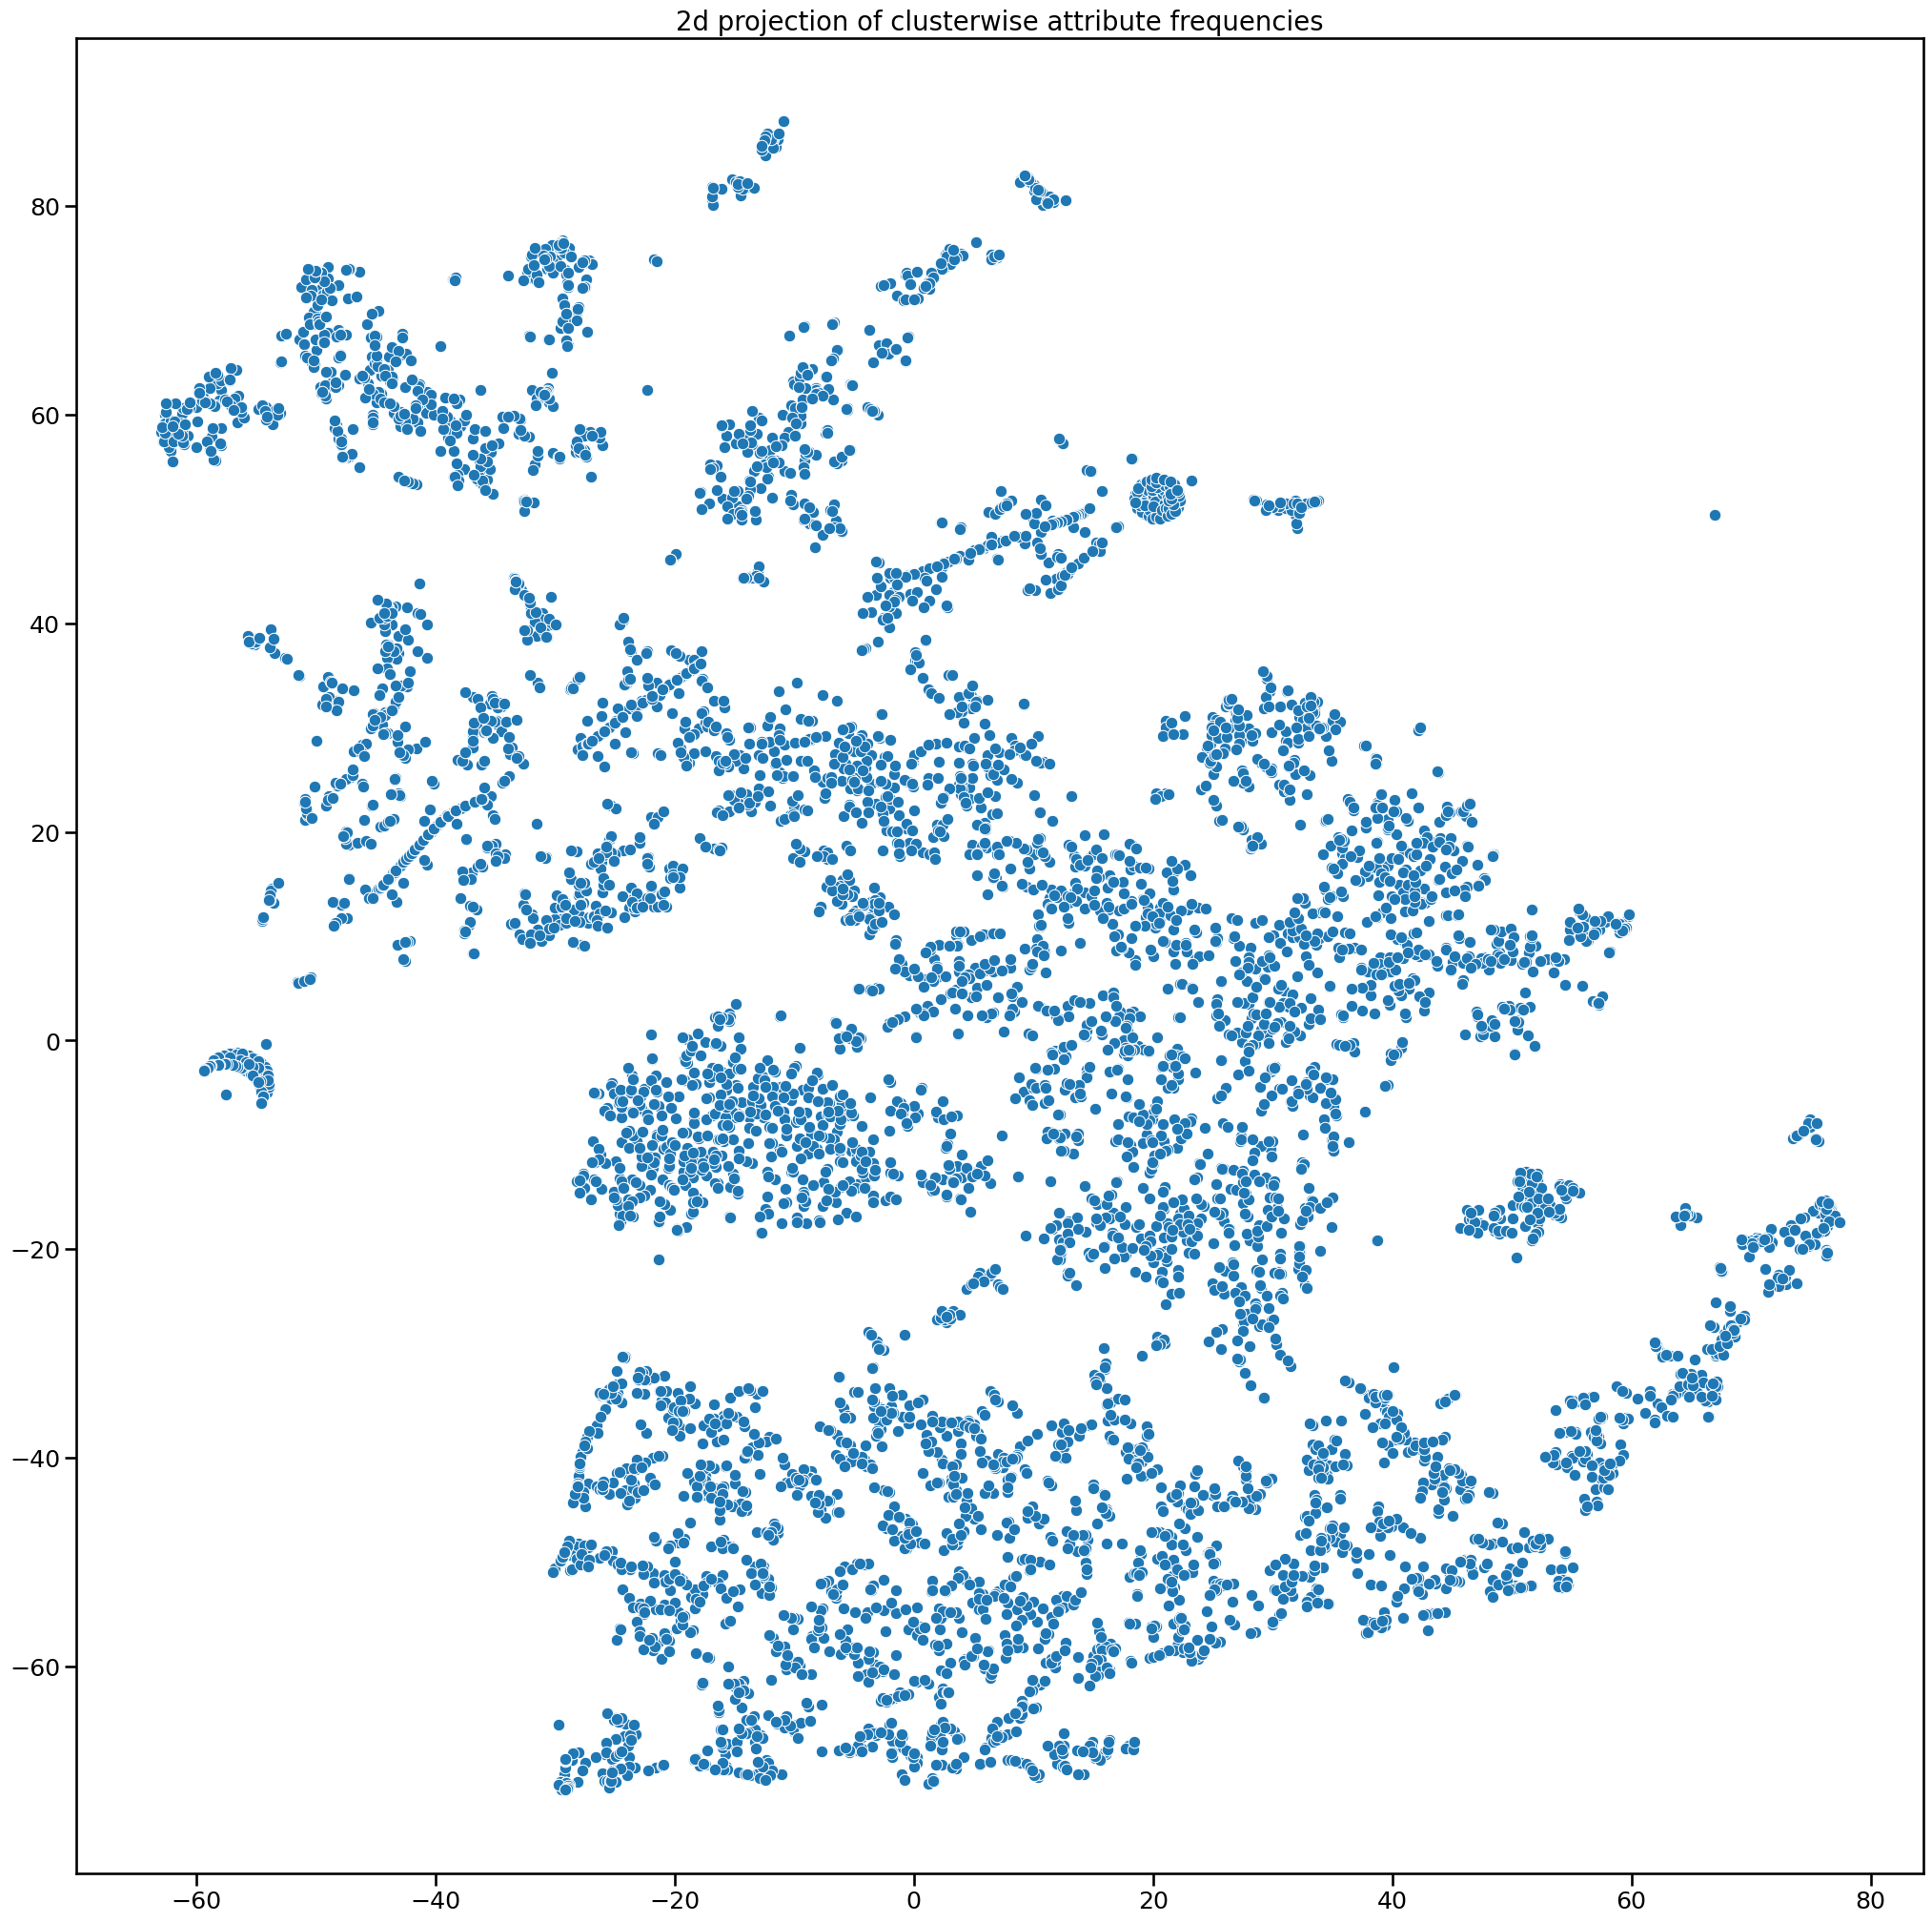

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,25))
plt.title('2d projection of clusterwise attribute frequencies')
sns.scatterplot(x=X_embedded.T[0], 
                y=X_embedded.T[1])
                #hue=kmeans.labels_,  style=kmeans.labels_,palette = "gist_rainbow",legend= 'full')

In [25]:
from sklearn.cluster import HDBSCAN, KMeans
hdb = HDBSCAN(min_cluster_size= 5)
hdb.fit(atb_freq.values)

HDBSCAN()

In [26]:
clust_atb['SuperClusterLabel'] = hdb.labels_

<Axes: title={'center': '2d projection of clusterwise attribute frequencies'}>

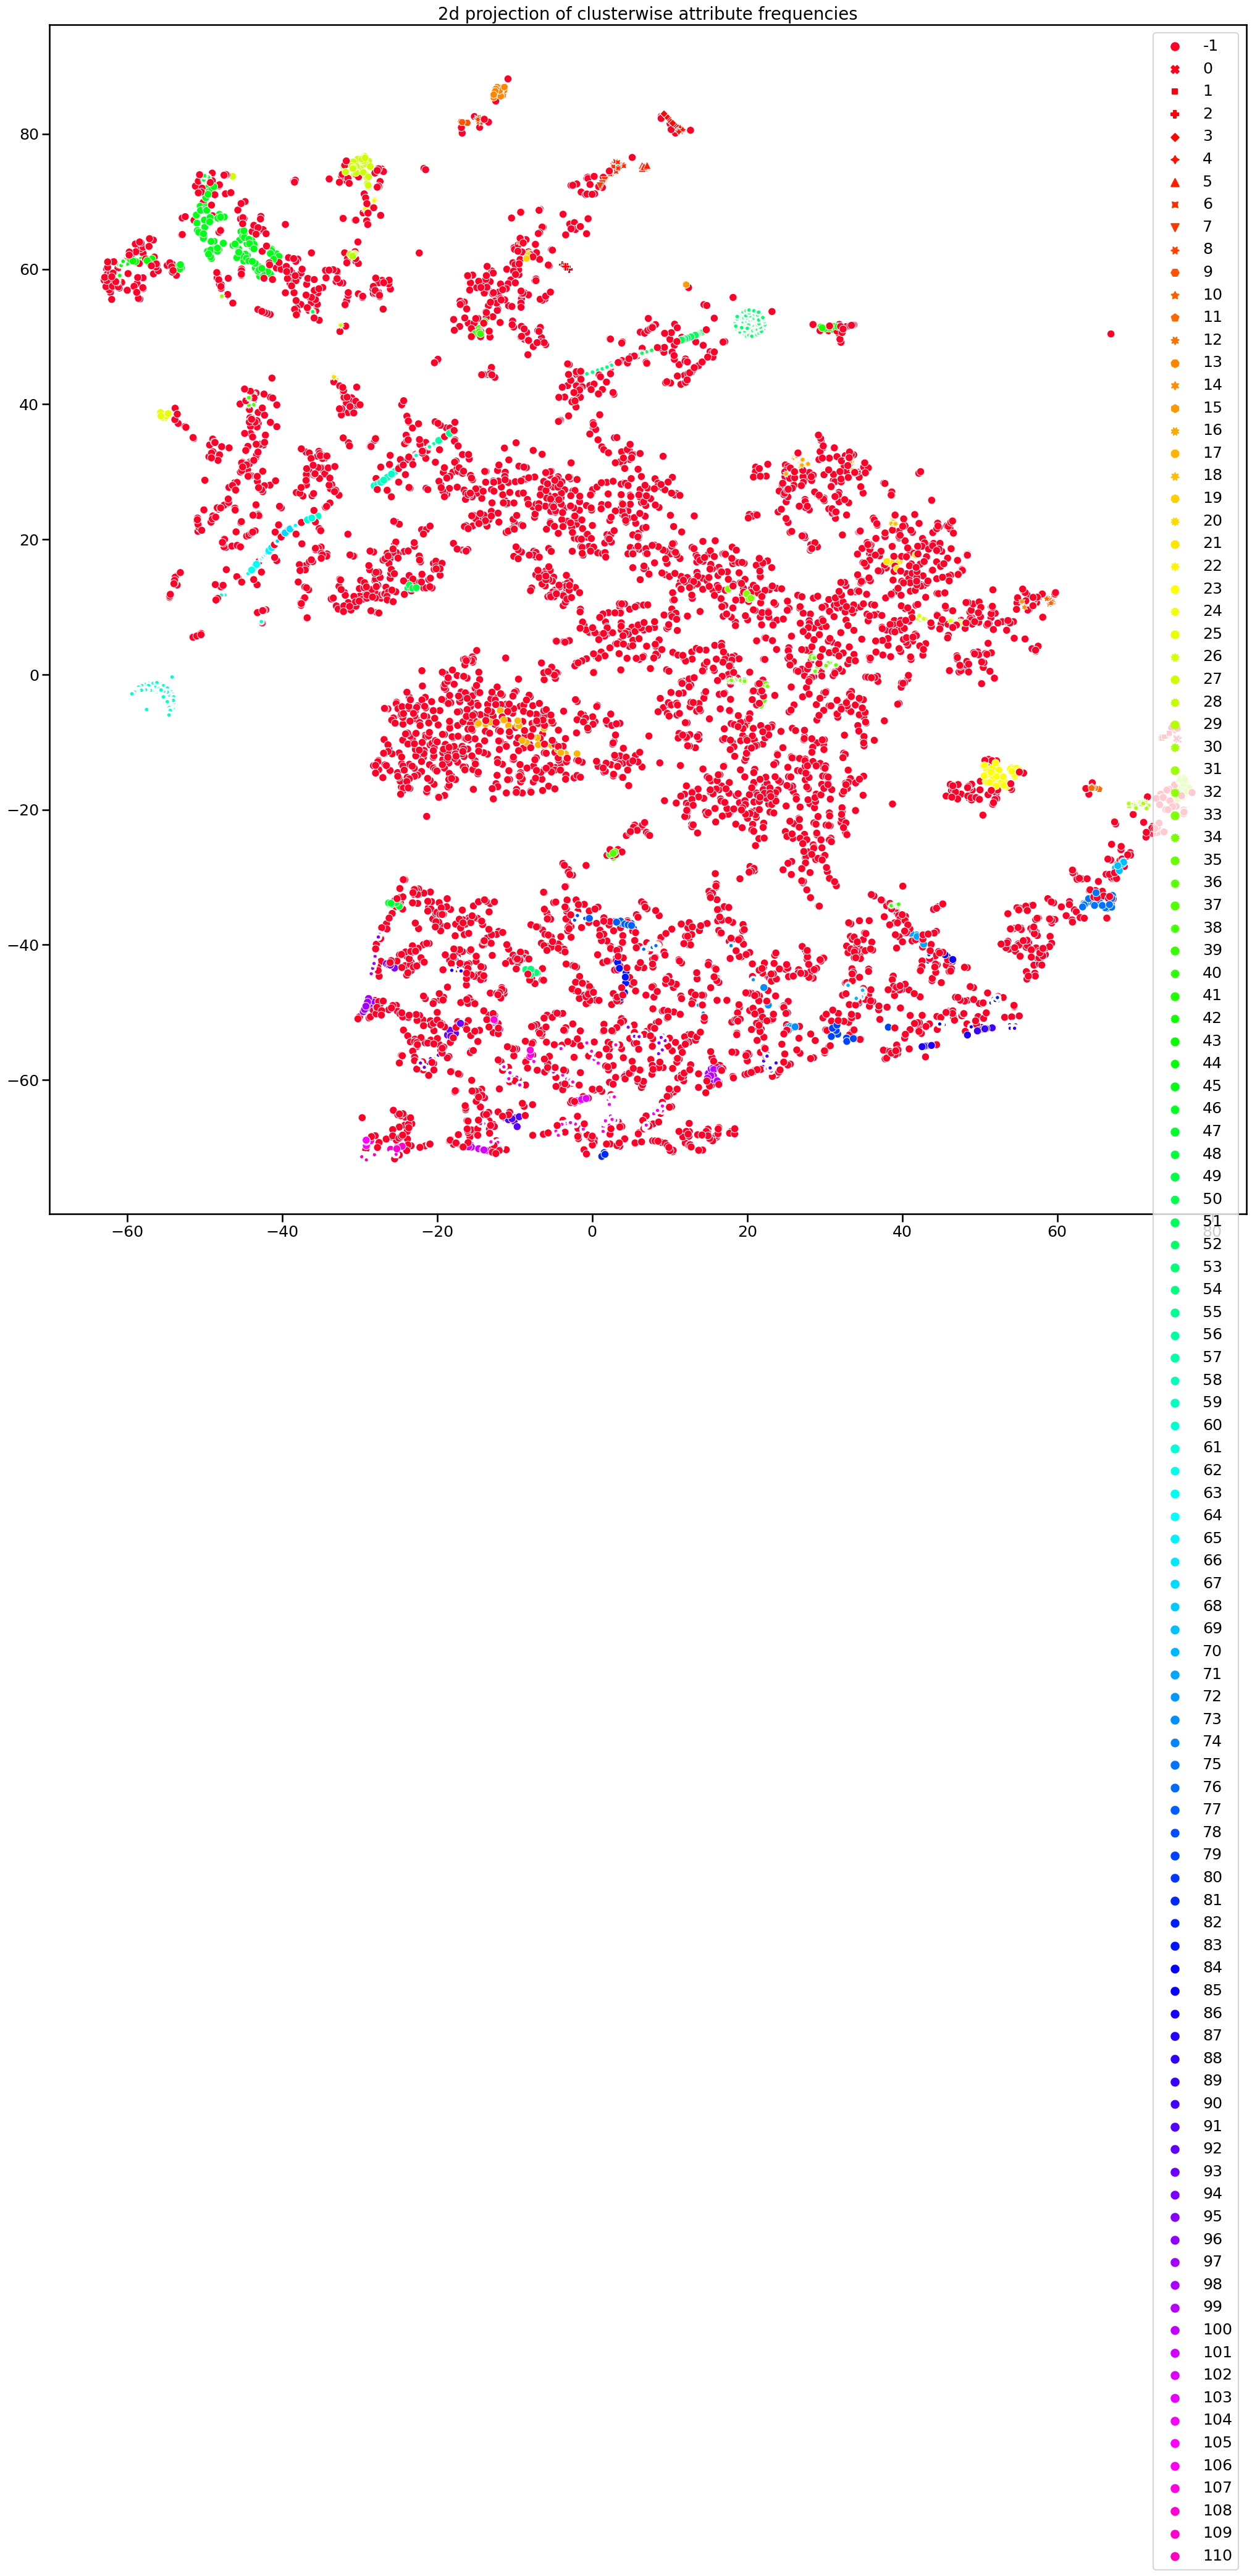

In [27]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,25))
plt.title('2d projection of clusterwise attribute frequencies')
sns.scatterplot(x=X_embedded.T[0], 
                y=X_embedded.T[1],
                hue=hdb.labels_,  style=hdb.labels_,palette = "gist_rainbow",legend= 'full')

In [28]:
#Frequency ranges 
freq_by_atb = atb_freq.describe().T
freq_by_atb = freq_by_atb[freq_by_atb['max'] >0]

In [29]:
freq_by_atb

,count,mean,std,min,25%,50%,75%,max
Method of Sweetening,7158.0,6.192338e-03,0.036710,0.000000,0.000000,0.000000,0.000000,0.904762
Level of Sugar/Sucrose/Sweetener Claim,7158.0,9.346532e-03,0.045363,0.000000,0.000000,0.000000,0.000000,0.904762
Whole Grains - Contained in Product,7158.0,2.349519e-03,0.019444,0.000000,0.000000,0.000000,0.000000,0.904762
Flavor(s),7158.0,4.931994e-03,0.028330,0.000000,0.000000,0.000000,0.000000,0.909091
Milk Product/Substitute,7158.0,1.835756e-03,0.016979,0.000000,0.000000,0.000000,0.000000,0.600000
Cheese Product Type,7158.0,2.134597e-03,0.020050,0.000000,0.000000,0.000000,0.000000,0.675000
Juice Percentage,7158.0,1.458076e-03,0.015468,0.000000,0.000000,0.000000,0.000000,0.538462
Level of Cooking,7158.0,3.125348e-03,0.024358,0.000000,0.000000,0.000000,0.000000,0.839286
Genre,7158.0,2.885377e-03,0.020548,0.000000,0.000000,0.000000,0.000000,0.500000
Color,7158.0,1.336612e-01,0.250346,0.000000,0.000000,0.000000,0.131094,1.000000


In [ ]:
import ast
clust_atb['Non-Null Attributes'] = clust_atb['Non-Null Attributes'].apply(lambda x: ast.literal_eval(x))
clust_atb['Attribute_Frequency'] = clust_atb.apply(lambda x: dict(zip(x['Non-Null Attributes'],\
                                                                      [i for i in list(x['AttributeVector']) if i !=0])), axis = 1)


In [ ]:
clust_atb['SuperClusterSize'] = clust_atb.SuperClusterLabel.map(dict(clust_atb.groupby('SuperClusterLabel').size()))

In [ ]:
clust_atb[['ClusterLabel','Cluster Name','Cluster Size','Attribute_Frequency','SuperClusterLabel','SuperClusterSize']].to_csv(path + 'Attribpath + uteFreqSuperClustering_0901.csv', index = None)

## wip

In [8]:

clust_itm_atb_yue = clust_itm_atb.copy()
clust_itm_atb_yue.dtypes['ClusterLabel']  # dtype('O')
clust_itm_atb_yue['ClusterLabel'] = clust_itm_atb_yue['ClusterLabel'].astype(int)  # dtype('int32')

In [10]:
clust_itm_atb_yue.dtypes['ClusterLabel']

dtype('int32')

In [11]:
atb_cols = clust_itm_atb.columns[4:]
res_freq_yue = pd.DataFrame(clust_itm_atb_yue.groupby('ClusterLabel').apply(lambda x:{i: len(x[i].dropna())/len(x) for i in atb_cols})).reset_index()

In [15]:
res_freq_yue.head()


,ClusterLabel,0
0,0,"{'Method of Sweetening': 0.0, 'Level of Sugar/..."
1,1,"{'Method of Sweetening': 0.0, 'Level of Sugar/..."
2,2,"{'Method of Sweetening': 0.11878453038674033, ..."
3,3,"{'Method of Sweetening': 0.0, 'Level of Sugar/..."
4,4,"{'Method of Sweetening': 0.0, 'Level of Sugar/..."


In [16]:
res_freq.head()

,ClusterLabel,0
0,0,"{'Method of Sweetening': 0.0, 'Level of Sugar/..."
1,1,"{'Method of Sweetening': 0.0, 'Level of Sugar/..."
2,10,"{'Method of Sweetening': 0.1234718826405868, '..."
3,100,"{'Method of Sweetening': 0.0, 'Level of Sugar/..."
4,1000,"{'Method of Sweetening': 0.015151515151515152,..."


In [31]:
clust_atb.head()

,ClusterLabel,Cluster Name,Cluster Size,Non-Null Attributes,AttributeVector,SuperClusterLabel
0,0,"PARTY EVERYDAY,NOVELTY AND DECOR,GIFT-WRAP SEA...",1306,"['Color', 'Size Description', 'Other Size Desc...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",13
1,1,"ACCENT FURNITURE,KITCHEN/DINING,DECORATIVE ACC...",1145,"['Genre', 'Color', 'Size Description', 'Other ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...",-1
2,2,"TEA BAGS & BULK TEA,TEA SWEETENED,TEA BAGS/HER...",1086,"['Method of Sweetening', 'Level of Sugar/Sucro...","[0.1234718826405868, 0.1332518337408313, 0.014...",-1
3,3,CARDS EVERYDAY,1085,"['VND_BRN_NAM', 'NET_CONT_EQV_UOM_VIP_TO_KRG_U...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009...",-1
4,4,"COLD WEATHER ACS,BRANDED COLLECTIONS,JUNIOR SL...",991,"['Color', 'Size Description', 'Other Size Desc...","[0.0151515151515151, 0.0151515151515151, 0.015...",35


In [32]:
list(atb_freq.values)[0:10]

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.83154671e-01, 7.65696784e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.65696784e-04, 0.00000000e+00, 7.65696784e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000